In [ ]:
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


# The Perceptron and beyond

In this section, we consider a regression task where the underlying data generation process is as follows:
$$ y = - \sin{(0.8 * x)}$$

Note that in this example there is no noise in the data, a case that you will rarely encounter in practice.

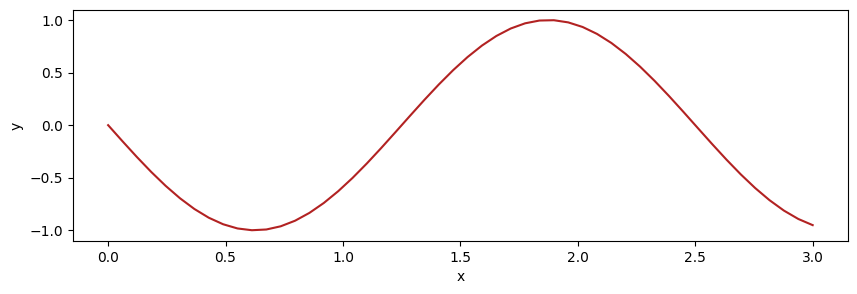

In [ ]:
# Defining our dataset

x_train = torch.linspace(0, 3, 50)
# y_train = - torch.sin(0.8*x_train)
y_train = - torch.sin(0.8*np.pi*x_train)

# Plotting the dataset

fig, ax = plt.subplots(figsize=(10, 3))

# plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color= "firebrick")
plt.show()

The following function can be used to instantiate the perceptron

In [ ]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

linear_model = perceptron()

# You can vizualize a summary of your model by commenting out the following line.
# Here it is an affine function in dimension 1, thus having two parameters.

# linear_model.summary()

To fit a model in keras, one must first compile it, that is specify the loss and optimizer. Here they are respectively chosen as the mean squared error and gradient descent. Observe that the batch size is the same as the size of the training dataset, resulting in batch gradient descent.

You can play with the learning rate and number of epochs to understand how the training algorithm behaves.

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4235
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4235
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4235
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4235
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4235
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4235
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4235
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4235
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4235
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4235
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4235
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4235
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4235
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4235
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4235
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

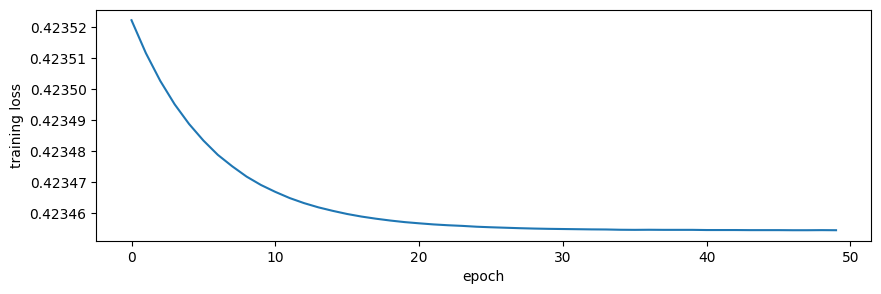

In [ ]:
linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2)
)
history = linear_model.fit(x_train, y_train, epochs= 50, batch_size= 50)
fig, ax = plt.subplots(figsize=(10, 3))
# plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Having trained the model, we can now use it in prediction.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


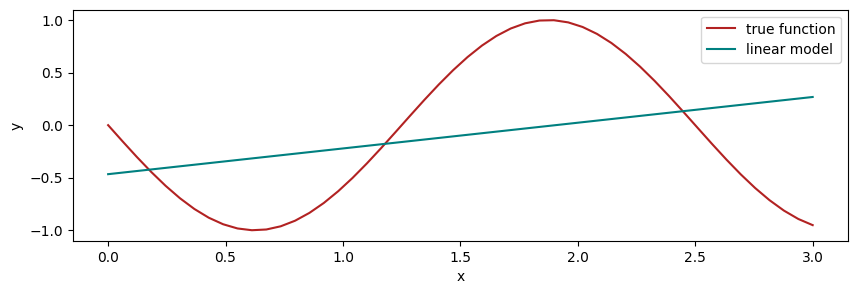

In [ ]:
y_pred_linear = linear_model.predict(x_train)
fig, ax = plt.subplots(figsize=(10, 3))
# plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color='firebrick', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

Beyond this simple perceptron, we now consider a 2-layers neural network model.

In [ ]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.1)
)

You can train the model, and play with the hyperparameters to answer the questions.

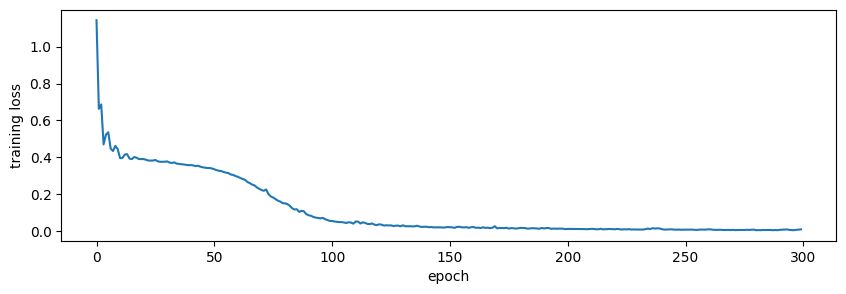

In [ ]:
history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

# plt.figure()
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


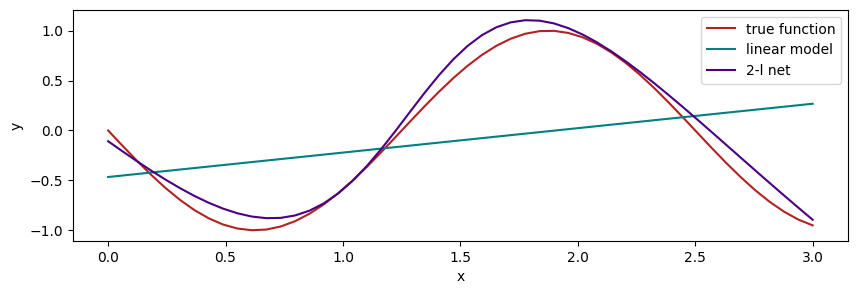

In [ ]:
y_pred_2l = net.predict(x_train)

# plt.figure()
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color='firebrick', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l net')
plt.legend()
plt.show()

# In the wild jungle of training algorithms

## Small model

We first start by defining a simple dataset based on a modified cosine surface. This will allows us to test small models, and in particular 2nd order optimization algorithms. While <tt>keras</tt> is high-level deep learning library, we will dive into the depths of <tt>pytorch</tt> to have more control over the optimization schemes.

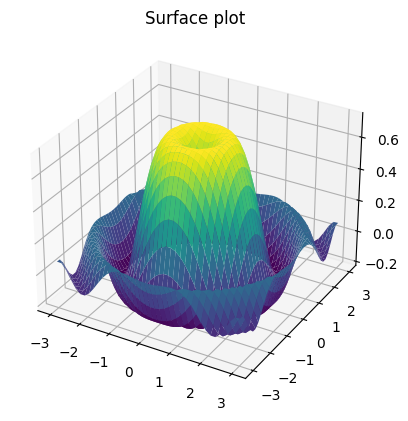

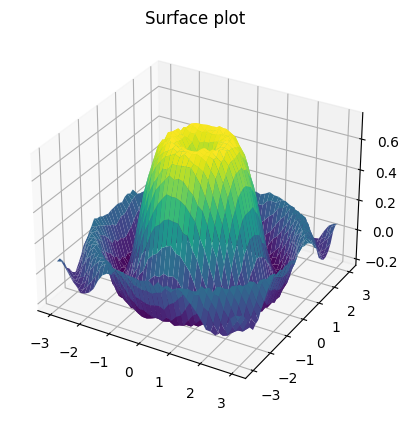

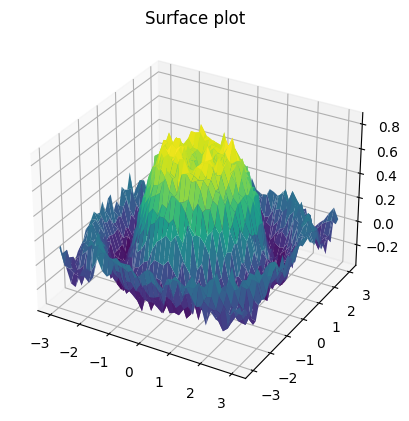

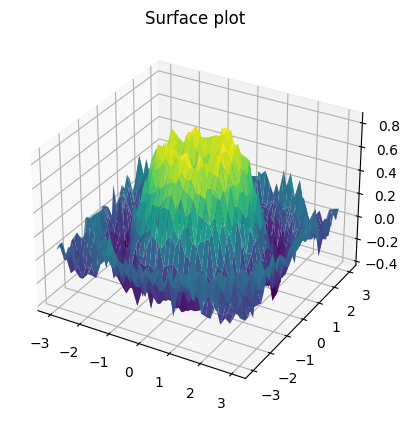

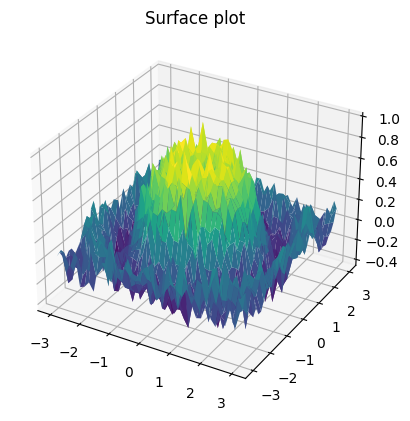

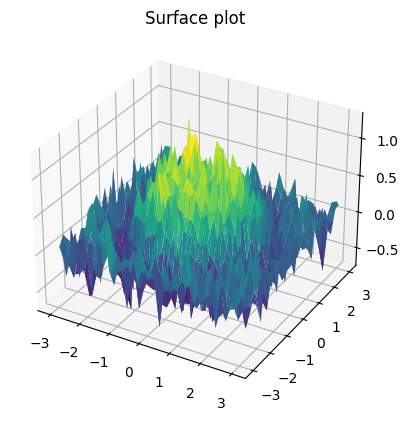

In [ ]:
def f(x, y):
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

def get_data(noise):
  # noise = 0
  mesh_size = 40
  t = torch.linspace(-3, 3, mesh_size)
  x, y = torch.meshgrid(t, t)
  z = f(x, y) + noise * torch.randn(mesh_size, mesh_size)

  fig = plt.figure()
  ax = plt.axes(projection='3d')

  ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
  ax.set_title('Surface plot')
  plt.show()


  # dataset creation
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  y_train = z.ravel()

  return x_train, y_train

noise_data_list = []



noise_data_list.append(get_data(0))
noise_data_list.append(get_data(0.01))
noise_data_list.append(get_data(0.05))
noise_data_list.append(get_data(0.075))
noise_data_list.append(get_data(0.1))
noise_data_list.append(get_data(0.2))



In [ ]:
print(np.shape(noise_data_list))

(6, 2)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


The following class encodes the architecture of a neural network with two hidden layers, for when the input data is 2-dimensional. We provide a simplified <tt>fit</tt> method to train the neural network. You are encouraged to understand the code, and what executing the functions will return so as to draw legitimate conclusions about the experiments.

In [ ]:
class Net3L(nn.Module):

    def __init__(self, n_neurons_l1= 10, n_neurons_l2= 10):
        super(Net3L, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, n_neurons_l1),
            nn.ReLU(),
            nn.Linear(n_neurons_l1, n_neurons_l2),
            nn.ReLU(),
            nn.Linear(n_neurons_l2, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Instantiate the train loader
        train_data = TensorDataset(x_train, y_train)
        train_loader = DataLoader(dataset =train_data, batch_size= batch_size, shuffle= True)
        # Beginning the optimization algorithm
        loss_list = []
        for n_epochs in range(n_epochs_max):
            # We train for a fixed number of epochs
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list


The cell below gives an example of what happens when the training is done using the L-BFGS algorithm. It can be adapted to other algorithms by modifying the arguments passed to the <tt>fit</tt> method.

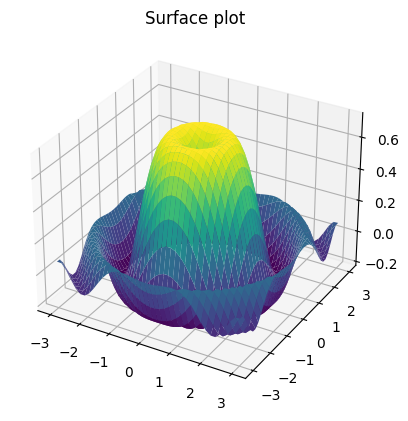

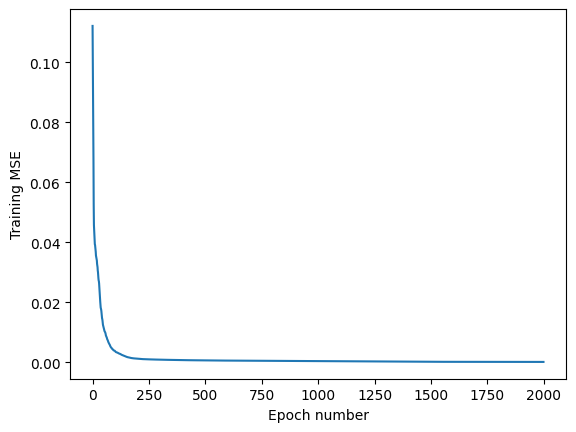

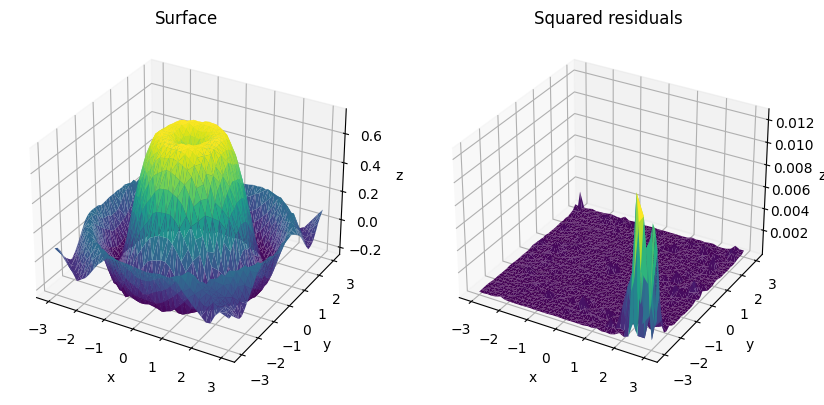

Training error: 0.00018200550402980298


In [ ]:
x_train, y_train = get_data(0)

net = Net3L(50, 50)
loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.plot(loss_list)
plt.show()

y_pred = net(x_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
#
ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred.detach().numpy().squeeze(-1), vmin=y_train.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface')
#
ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred.detach().squeeze(-1)-y_train)**2, vmin=0, cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Squared residuals')
plt.show()

print('Training error:', (nn.MSELoss()(y_pred.squeeze(-1), y_train)).item())

tensor([-3., -3.]) tensor(0.0716)
Training error: 0.00018200550402980298
tensor([-3., -3.]) tensor(0.0659)
Training error: 0.00029192669899202883
tensor([-3., -3.]) tensor(0.0918)
Training error: 0.002707806881517172
tensor([-3., -3.]) tensor(0.0643)
Training error: 0.005418287590146065
tensor([-3., -3.]) tensor(0.0445)
Training error: 0.0098823057487607
tensor([-3., -3.]) tensor(0.0272)
Training error: 0.04002496600151062


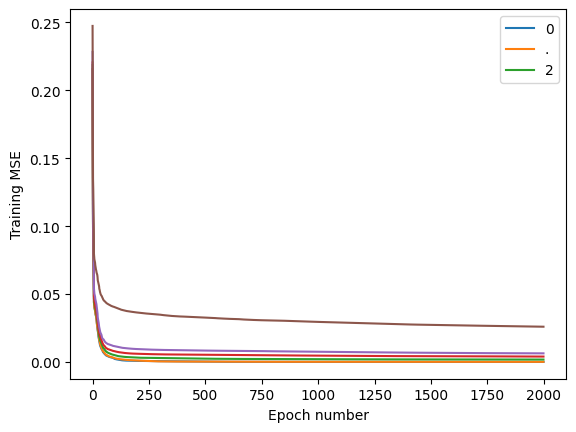

In [ ]:
loss_history_list = []

net = Net3L(50, 50)

net_list = [copy.deepcopy(net) for i in range(len(noise_data_list))]

for net_n, (x_train, y_train) in zip(net_list, noise_data_list):

  print(x_train[0], y_train[0])


  loss_list = net_n.fit(x_train, y_train, torch.optim.LBFGS(net_n.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

  loss_history_list.append(loss_list)

  print('Training error:', (nn.MSELoss()(y_pred.squeeze(-1), y_train)).item())

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
for loss_history in loss_history_list:
    plt.plot(loss_history)
plt.legend('0')
plt.legend('0.01')
plt.legend('0.05')
plt.legend('0.75')
plt.legend('0.1')
plt.legend('0.2')
plt.show()




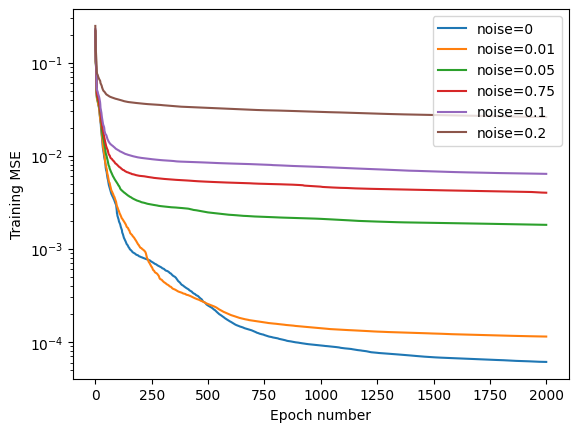

In [ ]:
plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.yscale('log')
for loss_history in loss_history_list:
    plt.plot(loss_history)

plt.legend(['noise=0', 'noise=0.01', 'noise=0.05', 'noise=0.75', 'noise=0.1', 'noise=0.2'])
plt.show()

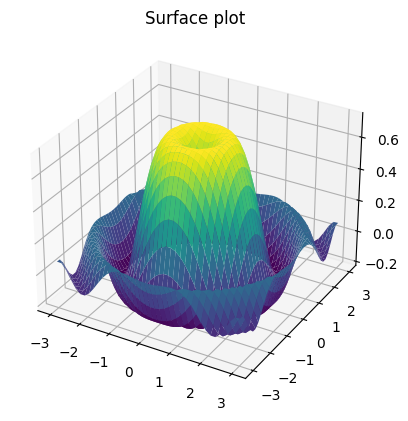

In [ ]:
x_train, y_train = get_data(0)

# Example with a list of optimizers
net = Net3L(50, 50)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(7)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 500
optimizer_list = [
    torch.optim.SGD(params=net_list[0].parameters(), lr=0.05),
    torch.optim.SGD(params=net_list[1].parameters(), lr=0.05),
    torch.optim.SGD(params=net_list[2].parameters(), lr=0.05),
    torch.optim.SGD(params=net_list[3].parameters(), lr=0.1),
    torch.optim.SGD(params=net_list[4].parameters(), lr=0.1, momentum=0.9, nesterov= True),
    torch.optim.Adam(params=net_list[5].parameters()),
    torch.optim.LBFGS(params=net_list[6].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')]
batch_sizes_list = [1600, 400, 40, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)


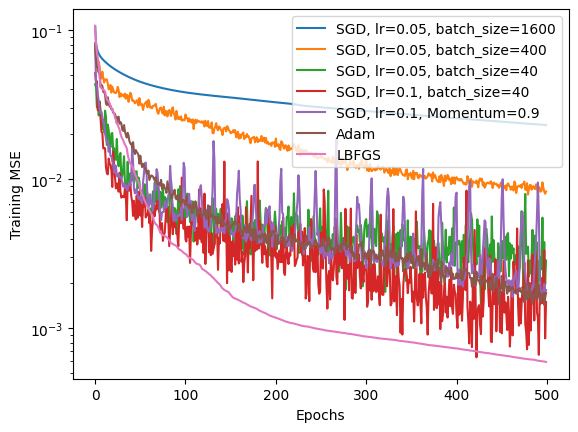

Respective times: [13.015145778656006, 12.198024034500122, 32.66612958908081, 31.726893186569214, 12.404795169830322, 13.613142728805542, 16.117314100265503]


In [ ]:
colors = cm.viridis(torch.linspace(0, 1, 6))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.yscale('log')
for i in range(7):
    plt.plot(loss_meta_list[i])#, color= colors[i])
plt.legend(['SGD, lr=0.05, batch_size=1600', 'SGD, lr=0.05, batch_size=400', 'SGD, lr=0.05, batch_size=40', 'SGD, lr=0.1, batch_size=40', 'SGD, lr=0.1, Momentum=0.9', 'Adam', 'LBFGS'])
plt.show()
#
print('Respective times:',times_list)


## Towards a bigger model

We now switch to a bigger model, used to perform classification over the MNIST dataset. This example is widely known in the machine learning community, and we follow the code in the footsteps of François Chollet, the creator of the <tt>keras</tt> library (https://keras.io/examples/vision/mnist_convnet/).

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


The following cell deals with the training of the model. Can you change the optimizer while still retaining the capabilities of the model trained with adam ?

In [ ]:
from keras.optimizers import SGD

batch_size = 128
epochs = 15

# keras.optimizers.SGD(
#     learning_rate=0.01,
#     momentum=0.0,
#     nesterov=False,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     name="SGD",
#     **kwargs
# )


# Modify the optimizer here
# opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.4, decay=0.0, nesterov=False)
opt = keras.optimizers.Adadelta(
    learning_rate=1.,
    rho=0.95,
    epsilon=1e-07
)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.7828 - loss: 0.6653 - val_accuracy: 0.9758 - val_loss: 0.0877
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9625 - loss: 0.1229 - val_accuracy: 0.9843 - val_loss: 0.0584
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9721 - loss: 0.0918 - val_accuracy: 0.9868 - val_loss: 0.0499
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9758 - loss: 0.0776 - val_accuracy: 0.9870 - val_loss: 0.0474
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9781 - loss: 0.0699 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9803 - loss: 0.0628 - val_accuracy: 0.9877 - val_loss: 0.0424
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9817 - loss: 0.0587 - val_accuracy: 0.9900 - val_loss: 0.0351
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9834 - loss: 0

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.06587475538253784
Test accuracy: 0.978600025177002


In [ ]:
total_params = model.count_params()
total_params

34826

In [ ]:
model_sum = model.summary()
model_sum

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 26, 26, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 13, 13, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 11, 11, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 5, 5, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 1600)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 1600)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 10)                    │      16,010 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 104,480 (408.12 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

# A personal regression example

For this exercise, you will work on a dataset that is built from your personal student number as indicated in the assignment.

In [ ]:
data = pd.read_csv("data.csv", header= None).values.T

def dataset_generation(d1, d2, d3, d4, d5):
    T_new = (d1 * data[:, 2] + d2 * data[:, 3] + d3 * data[:, 4] + d4 * data[:, 5] + d5 * data[:, 6])/(d1 + d2 + d3 + d4 + d5)
    return T_new

x_values = data[:, 0:2]

# Put your own (decreasingly ordered) student number in the function

T_new =  dataset_generation(9, 9, 7, 6, 5)

# Random subsampling to get the working dataset
idx = np.random.permutation(13600)

# training set
x_train = x_values[idx[0:2000]]
y_train = T_new[idx[0:2000]]

# test set
x_test = x_values[idx[2000:3000]]
y_test = T_new[idx[2000:3000]]


print('Number of training datapoints:', x_train.shape[0])
print('Number of testing datapoints:', x_test.shape[0])

Number of training datapoints: 2000
Number of testing datapoints: 1000


You can now plot the surface of the dataset. (Hint: use the function <tt> plot_trisurf </tt>)

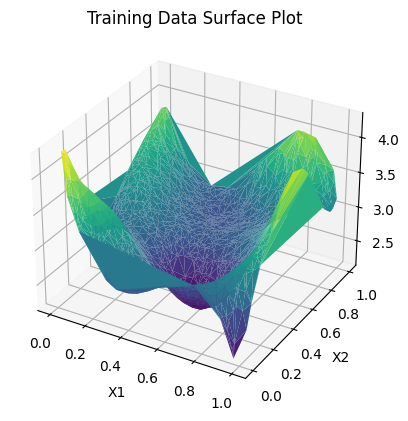

In [ ]:
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# Splitting the x_train into its two components for plotting
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

# Creating the 3D plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# Plotting the surface using plot_trisurf
ax.plot_trisurf(x1_train, x2_train, y_train, cmap='viridis')

# Setting labels for better understanding of the plot
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Training Data Surface Plot')


plt.show()


In the following, we give an example of how to train a model. When you train yours, do not forget to validate it ! Hint: it is not enough to look at the training error. The hyperparameter values have voluntarily be set to give suboptimal results, you can do better than the proposed architecture !

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

# INIT VALS:
my_epochs = 500
my_patience = 5

## Net_0

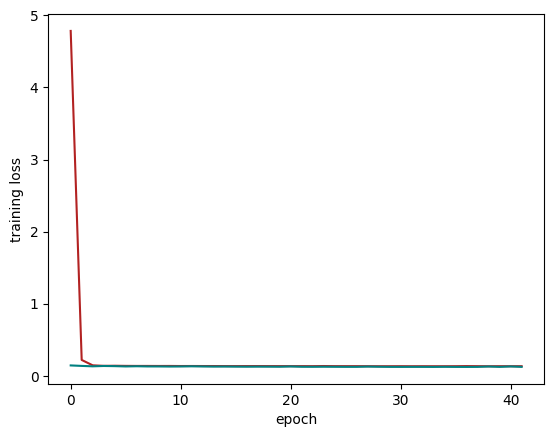

Last training error: 0.13435502350330353
Last validation error: 0.1250174343585968


In [ ]:
net_0 = keras.Sequential(
        [
            keras.layers.Input(shape= [x_train.shape[1]]),
            keras.layers.Dense(units= 3, activation='tanh'),
            keras.layers.Dense(units= 1)
        ]
    )

net_0.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.05)
    # optimizer = keras.optimizers.Adam(learning_rate= 0.01)
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_0 = net_0.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_0.history['loss'], color= "firebrick")
plt.plot(history_0.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_0.history['loss'][-1])
print('Last validation error:', history_0.history['val_loss'][-1])

# Net_1

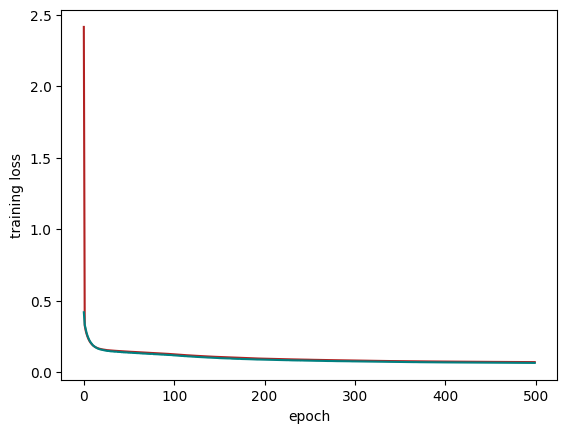

Last training error: 0.07123522460460663
Last validation error: 0.06560544669628143


In [ ]:
net_1 = keras.Sequential(
    [
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train.shape[1],)),
        Dense(1)
    ])

net_1.compile(optimizer='sgd', loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_1 = net_1.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_1.history['loss'], color= "firebrick")
plt.plot(history_1.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_1.history['loss'][-1])
print('Last validation error:', history_1.history['val_loss'][-1])

# Net_2

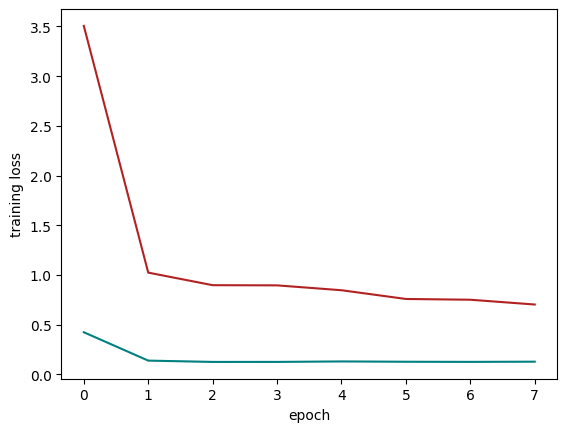

Last training error: 0.7014525532722473
Last validation error: 0.12615898251533508


In [ ]:
net_2 = keras.Sequential(
        [
          Dense(64, activation='sigmoid', input_shape=(x_train.shape[1],)),
          Dropout(0.5),
          Dense(48, activation='sigmoid'),
          Dropout(0.5),
          Dense(1)
        ]
    )

net_2.compile(optimizer='adam', loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_2 = net_2.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_2.history['loss'], color= "firebrick")
plt.plot(history_2.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_2.history['loss'][-1])
print('Last validation error:', history_2.history['val_loss'][-1])

# Net_3

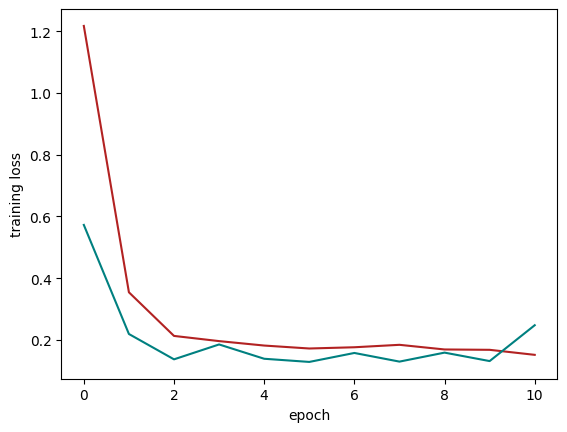

Last training error: 0.15175169706344604
Last validation error: 0.24773527681827545


In [ ]:
net_3 = keras.Sequential(
        [
          Dense(128, activation='elu', input_shape=(x_train.shape[1],)),
          Dense(96, activation='elu'),
          Dense(64, activation='elu'),
          Dense(1)
        ]
    )

net_3.compile(optimizer='rmsprop', loss='mean_squared_error')
# callback3 = EarlyStopping(monitor='val_loss', patience=5)


callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_3 = net_3.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_3.history['loss'], color= "firebrick")
plt.plot(history_3.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_3.history['loss'][-1])
print('Last validation error:', history_3.history['val_loss'][-1])

# Net_4

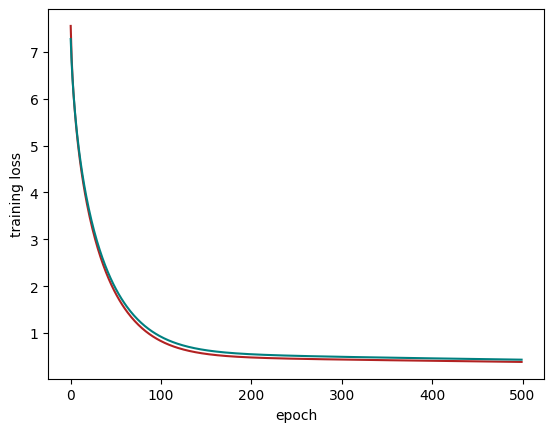

Last training error: 0.38268402218818665
Last validation error: 0.4306853115558624


In [ ]:
net_4 = keras.Sequential(
        [
          Dense(50, activation='tanh', kernel_constraint=keras.constraints.max_norm(2.), input_shape=(x_train.shape[1],)),
          Dense(1)
        ]
    )

net_4.compile(optimizer='adagrad', loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_4 = net_4.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_4.history['loss'], color= "firebrick")
plt.plot(history_4.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_4.history['loss'][-1])
print('Last validation error:', history_4.history['val_loss'][-1])

# Net_5

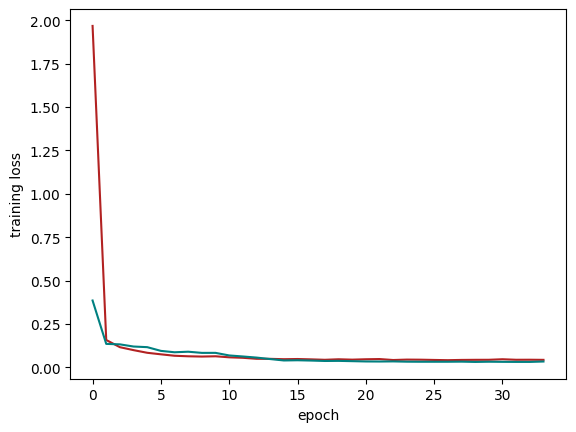

Last training error: 0.043489422649145126
Last validation error: 0.03394892439246178


In [ ]:
net_5 = keras.Sequential(
        [
          BatchNormalization(input_shape=(x_train.shape[1],)),
          Dense(20, activation='relu'),
          Dense(1)
        ]
    )

net_5.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_5 = net_5.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_5.history['loss'], color= "firebrick")
plt.plot(history_5.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_5.history['loss'][-1])
print('Last validation error:', history_5.history['val_loss'][-1])

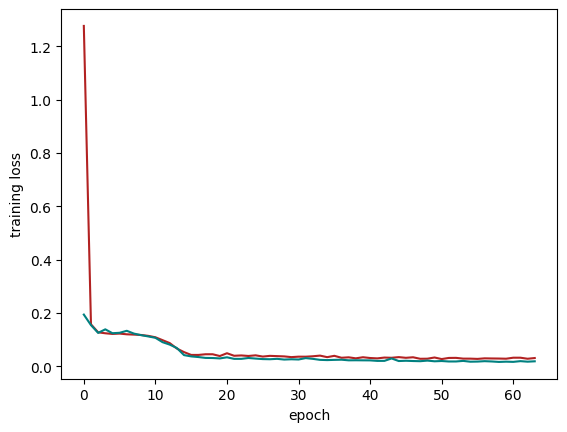

Last training error: 0.03149222210049629
Last validation error: 0.0192489605396986


In [ ]:
net_5 = keras.Sequential(
        [
          BatchNormalization(input_shape=(x_train.shape[1],)),
          Dense(20, activation='relu'),
          Dense(10, activation='relu'),
          Dense(1)
        ]
    )

net_5.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_5 = net_5.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_5.history['loss'], color= "firebrick")
plt.plot(history_5.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_5.history['loss'][-1])
print('Last validation error:', history_5.history['val_loss'][-1])

Once a model is trained, you can use it to assess the final performance of the model on the test set.

In [ ]:
y_pred = net_0.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 1ms/step
Final test error: 0.0682465374565052


In [ ]:
y_pred = net_1.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 1ms/step
Final test error: 0.0288260391944757


In [ ]:
y_pred = net_2.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 1ms/step
Final test error: 0.0690606468044642


In [ ]:
y_pred = net_3.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 1ms/step
Final test error: 0.126990572815531


In [ ]:
y_pred = net_4.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 1ms/step
Final test error: 0.20844708960909036


In [ ]:
y_pred = net_5.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 2ms/step
Final test error: 0.010382534869579555


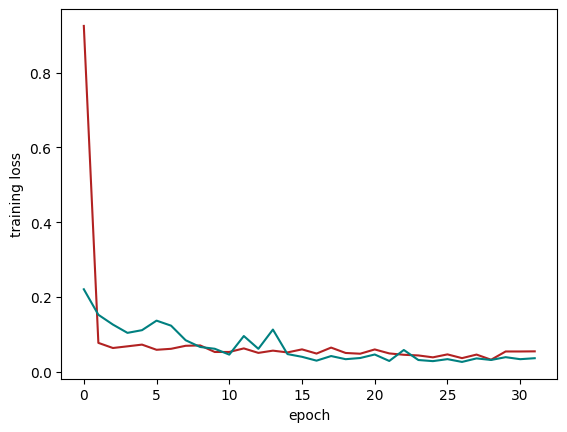

Last training error: 0.05455033481121063
Last validation error: 0.03621230274438858


In [ ]:
net_6 = keras.Sequential(
        [
          BatchNormalization(input_shape=(x_train.shape[1],)),
          Dense(20, activation='relu'),
          Dense(10, activation='relu'),
          Dense(1)
        ]
    )


net_6.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.1, weight_decay=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07), loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_6 = net_6.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_6.history['loss'], color= "firebrick")
plt.plot(history_6.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_6.history['loss'][-1])
print('Last validation error:', history_6.history['val_loss'][-1])

In [ ]:
y_pred = net_6.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 2ms/step
Final test error: 0.01920438165229081


32/32 [==============================] - 0s 3ms/step


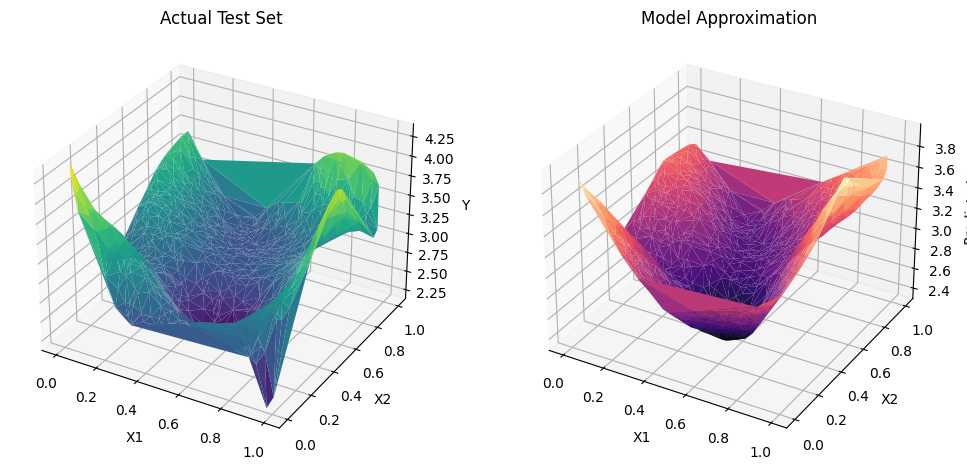

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Predictions from the neural network for the test set
y_pred = net_5.predict(x_test).flatten()

# Splitting the x_test into its two components for plotting
x1_test = x_test[:, 0]
x2_test = x_test[:, 1]

# Creating the 3D plot for the test set and the model's predictions
fig = plt.figure(figsize=(12, 6))

# Plot for the actual test set
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(x1_test, x2_test, y_test, cmap='viridis')
ax1.set_title('Actual Test Set')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Plot for the model's predictions
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(x1_test, x2_test, y_pred, cmap='magma')
ax2.set_title('Model Approximation')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Predicted Y')

plt.show()

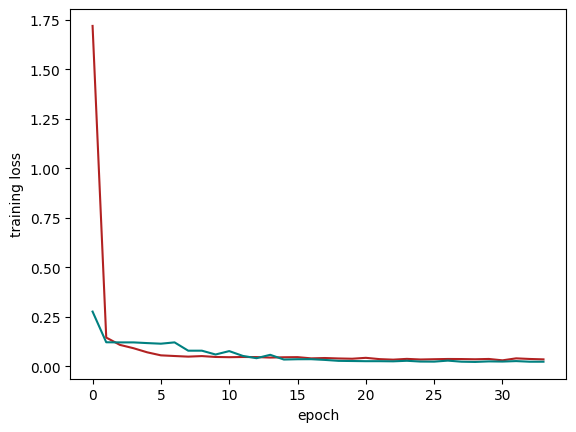

Last training error: 0.03457064926624298
Last validation error: 0.022792698815464973


In [ ]:
net_6 = keras.Sequential(
        [
          BatchNormalization(input_shape=(x_train.shape[1],)),
          Dense(20, activation='relu'),
          Dense(50, activation='relu'),
          Dense(50, activation='relu'),
          Dense(30, activation='relu'),
          Dense(1)
        ]
    )

net_6.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_6 = net_6.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_6.history['loss'], color= "firebrick")
plt.plot(history_6.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_6.history['loss'][-1])
print('Last validation error:', history_6.history['val_loss'][-1])

In [ ]:
y_pred = net_6.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 2ms/step
Final test error: 0.011864973234585362


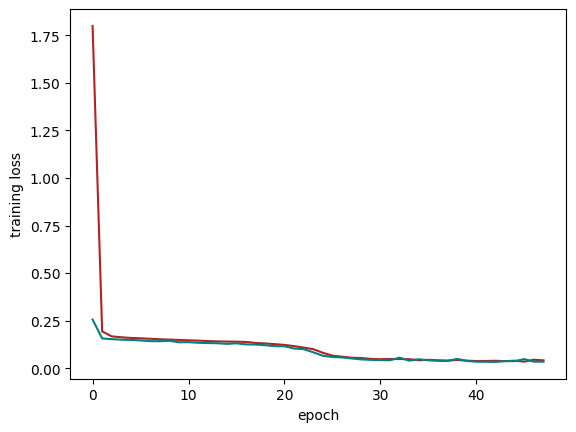

Last training error: 0.04160471260547638
Last validation error: 0.03464382141828537


In [ ]:
net_7 = keras.Sequential(
        [
          Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train.shape[1],)),
          Dense(64, activation='relu'),
          Dense(128, activation='relu'),
          Dense(128, activation='relu'),
          Dense(64, activation='relu'),
          Dense(1)
        ]
    )

net_7.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss='mean_squared_error')

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=my_patience)
history_7 = net_7.fit(x_train, y_train, validation_split= 0.2, epochs= my_epochs, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history_7.history['loss'], color= "firebrick")
plt.plot(history_7.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history_7.history['loss'][-1])
print('Last validation error:', history_7.history['val_loss'][-1])

In [ ]:
y_pred = net_7.predict(x_test).flatten() #UPDATE THIS TO INCLUDE .flatten() AS THIS WAS AN ERROR IN THE CODE!!!!
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 [==============================] - 0s 3ms/step
Final test error: 0.015638450218753965
